In [7]:
def get_acc_grow(svm_acc_grow):
    if(svm_acc_grow == 0):
        return 999
    else:
        return svm_acc_grow

In [8]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from generate_dataset import *

n_samples = 10

samples_per_n = 100

testing_size = 500


x_start = -10
x_end = 10
y_start = -10
y_end = 10
margin = 0

svm_kernel = []
for kernel in (('linear', 'poly')):
    print("working on kernel: ", kernel)
    testing_data, testing_models = make_poly(testing_size, x_start, x_end, y_start, y_end, margin)
    svm_data = []
    svm_acc_grow = 0
    for i in range(1, 11):
        print("Currently in train set: ", i)
        training_size = i * n_samples
        svm_samples = []
        for j in range(samples_per_n):
            # 1. Generate train set with at least 1 of each class
            training_data = []
            training_models = []
            while list(training_models).count(1) < 1 or list(training_models).count(-1) < 1:
                training_data, training_models = map(
                    np.array,
                    make_poly(training_size, x_start, x_end, y_start, y_end, margin)
                )

            clf = svm.SVC(kernel=kernel, C=1.0)

            #fit data
            svm_results = clf.fit(training_data, training_models).predict(testing_data)
            #get the results model
            svm_acc = sum(1 if x == y else 0 for x, y in zip(svm_results, testing_models))
            svm_acc /= len(testing_data)
            svm_samples.append(svm_acc)
        svm_avg = (statistics.mean(svm_samples)) * 100
        svm_std = statistics.pstdev(svm_samples) * 100
        svm_data.append([training_size, svm_avg, svm_std, kernel])
        svm_acc_grow = statistics.mean(svm_samples)
    svm_kernel.append(svm_data)

working on kernel:  linear
Currently in train set:  1
Currently in train set:  2
Currently in train set:  3
Currently in train set:  4
Currently in train set:  5
Currently in train set:  6
Currently in train set:  7
Currently in train set:  8
Currently in train set:  9
Currently in train set:  10
working on kernel:  poly
Currently in train set:  1
Currently in train set:  2
Currently in train set:  3
Currently in train set:  4
Currently in train set:  5
Currently in train set:  6
Currently in train set:  7
Currently in train set:  8
Currently in train set:  9
Currently in train set:  10


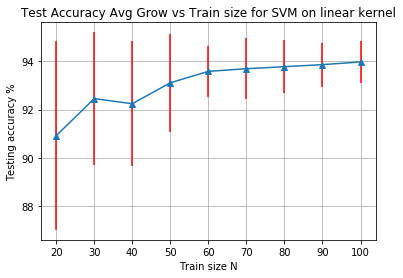

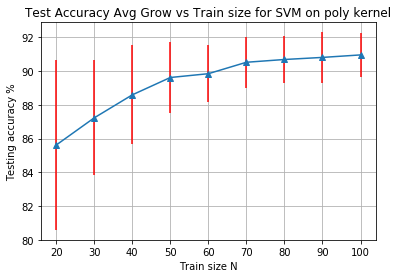

In [9]:
for svm_data in svm_kernel:
    svm_data.pop(0)
    # Same as above but with standard deviation
    plt.figure()
    plt.title('Test Accuracy Avg Grow vs Train size for SVM on {kernel} kernel'.format(kernel=svm_data[0][3]))
    plt.xlabel('Train size N')
    plt.ylabel('Testing accuracy %')
    std = []
    std_uncertainty = []
    for point in svm_data:
        std.append(point[1])
        std_uncertainty.append(point[2])
    plt.grid(True)
    # Perceptron data in red
    plt.errorbar(
        [point[0] for point in svm_data],
        [point[1] for point in svm_data],
        [point[2] for point in svm_data],
        ecolor='r',
        marker='^'
    )


    plt.show()

